In [ ]:
pip install pystan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 2.0 MB/s eta 0:00:0000:0100:01
  DEPRECATION: Building 'pysimdjson' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pysimdjson'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [182 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-11.1-arm64-cpython-313
      creating build/lib.macosx-11.1-ar

In [3]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
from prophet import Prophet

In [31]:
# Python
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/refs/heads/master/airline-passengers.csv')
print(df.head(5))

# rename columns as per fb prophet model
df = df.rename(columns={'Passengers' : 'y','Month': 'ds'})
print('<---Dataframe after column rename--->')
print(df)

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
<---Dataframe after column rename--->
          ds    y
0    1949-01  112
1    1949-02  118
2    1949-03  132
3    1949-04  129
4    1949-05  121
..       ...  ...
139  1960-08  606
140  1960-09  508
141  1960-10  461
142  1960-11  390
143  1960-12  432

[144 rows x 2 columns]


In [32]:
df['y_orig'] = df['y']
print(df)

          ds    y  y_orig
0    1949-01  112     112
1    1949-02  118     118
2    1949-03  132     132
3    1949-04  129     129
4    1949-05  121     121
..       ...  ...     ...
139  1960-08  606     606
140  1960-09  508     508
141  1960-10  461     461
142  1960-11  390     390
143  1960-12  432     432

[144 rows x 3 columns]


In [33]:
model = Prophet()
model.fit(df)

# train_test_split : df: train/ test , then run the code for train and compare it with the test



11:02:54 - cmdstanpy - INFO - Chain [1] start processing
11:02:54 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
'''
    'year': 'A',
    'quarter': 'Q',
    'month': 'M',
    'day': 'D',
    'hour': 'H',
    'minute': 'T',
    'second': 'S',
    'millisecond': 'L',
    'microsecond': 'U',
    'nanosecond':'N'
'''
future_data = model.make_future_dataframe(periods = 12, freq = 'ME')
future_data.tail()

,ds
151,1961-07-31
152,1961-08-31
153,1961-09-30
154,1961-10-31
155,1961-11-30


In [35]:
forecast_data = model.predict(future_data)
forecast_data.tail(5)
#forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
151,1961-07-31,509.216973,547.806139,604.498037,508.909096,509.574057,67.030075,67.030075,67.030075,67.030075,67.030075,67.030075,0.0,0.0,0.0,576.247048
152,1961-08-31,512.350022,504.095746,559.877444,511.980806,512.776700,18.055855,18.055855,18.055855,18.055855,18.055855,18.055855,0.0,0.0,0.0,530.405877
153,1961-09-30,515.382004,464.856564,521.392615,514.932707,515.879871,-22.265769,-22.265769,-22.265769,-22.265769,-22.265769,-22.265769,0.0,0.0,0.0,493.116236
154,1961-10-31,518.515053,433.616516,491.371622,517.995354,519.085563,-55.153819,-55.153819,-55.153819,-55.153819,-55.153819,-55.153819,0.0,0.0,0.0,463.361234
155,1961-11-30,521.547035,465.352668,521.404914,520.937213,522.199269,-28.553713,-28.553713,-28.553713,-28.553713,-28.553713,-28.553713,0.0,0.0,0.0,492.993323


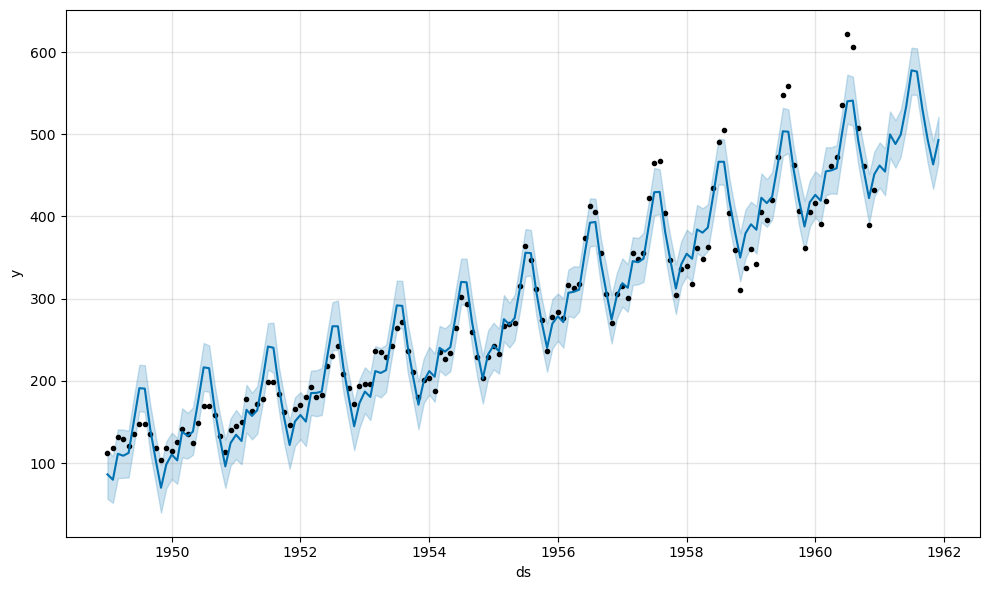

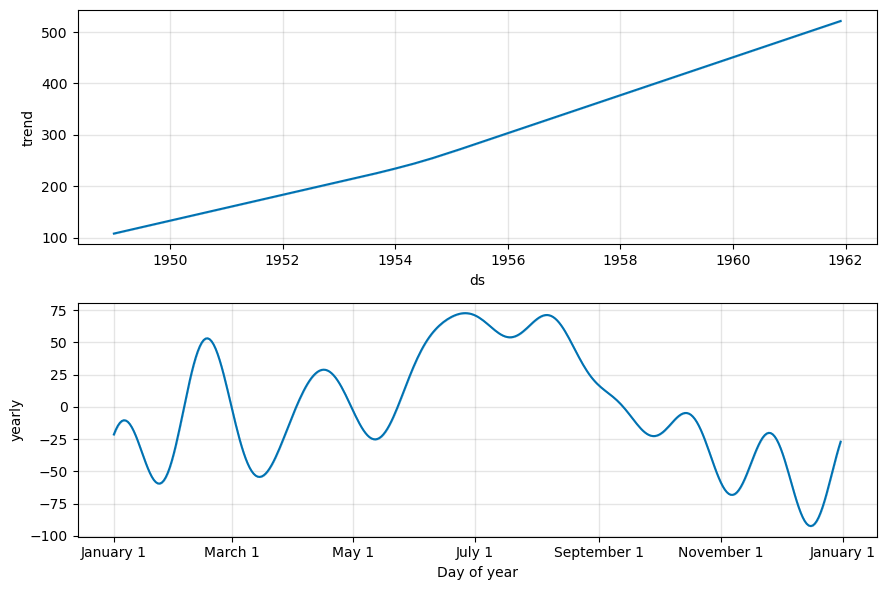

In [36]:
fig1 = model.plot(forecast_data)
fig2 = model.plot_components(forecast_data)

/opt/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


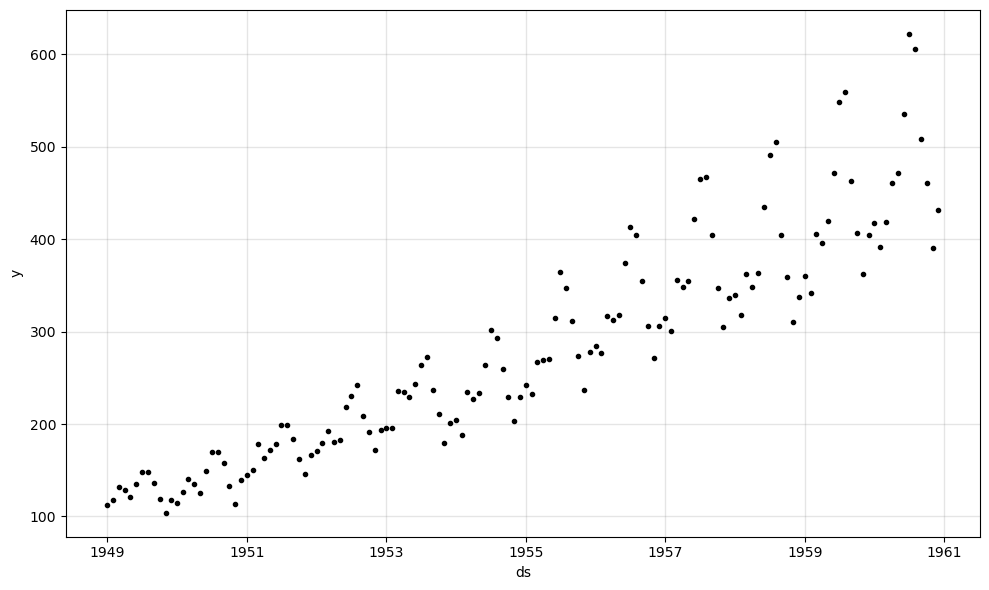

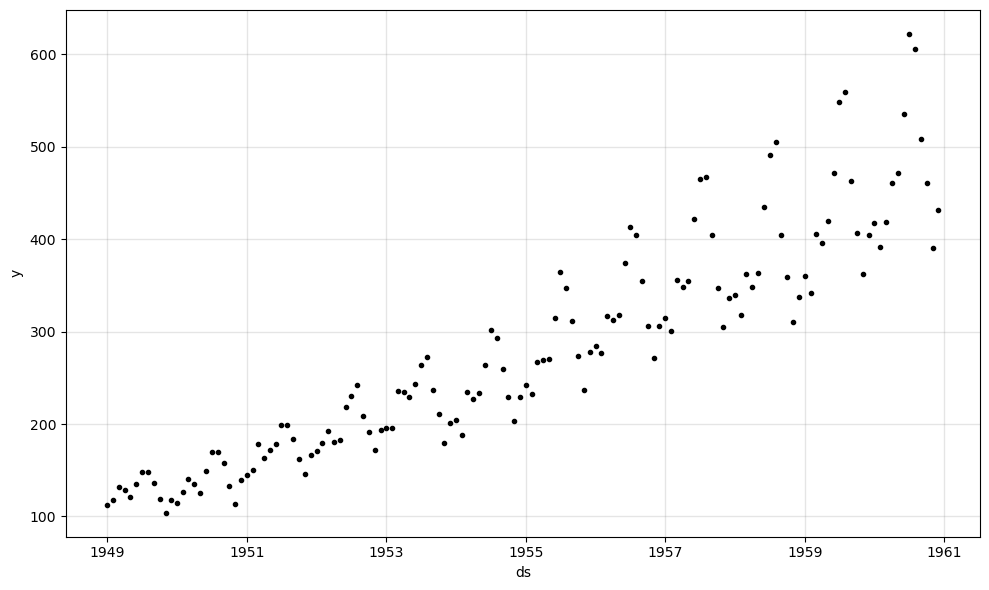

In [38]:
forecast_data_orig = forecast_data
forecast_data_orig['yhat'] = np.exp(forecast_data['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data['yhat_upper'])
model.plot(forecast_data_orig)
